In [1]:
import pandas as pd
import tensorflow as tf
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Initializing a Hugging Face pipeline
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [3]:
# Loading the dataset
df = pd.read_csv('../data/headlines.csv')

In [4]:
# Filtering articles from South Africa
df_SA = df[df['country'].str.startswith('South')]

# Function to classify emotions
def classify_emotions(data):
    return [emotion_classifier(headline)[0]['label'] for headline in data['headline_no_site']]

In [5]:
# Classifying emotions for SA headlines
classified_headline = classify_emotions(df_SA)

In [6]:
# Cleaning the "time" column to only show year
df_SA['time'] = df_SA['time'].str.split('-').str[0]

In [7]:
# Creating a dictionary to store the classified headlines for each year
year_headlines = {}

In [8]:
# Iterating over the rows of df_SA dataset
for _, row in df_SA.iterrows():
    year = row['time']
    emotion = classified_headline.pop(0)  # Get the next emotion from the list
    year_headlines.setdefault(year, []).append(emotion)

In [9]:
# Investigating the number of articles for each year in SA
for year, headlines in year_headlines.items():
    num_articles = len(headlines)
    print(f"Year: {year} | Number of Articles: {num_articles}")

Year: 2018 | Number of Articles: 3204
Year: 2019 | Number of Articles: 3582
Year: 2017 | Number of Articles: 2320
Year: 2014 | Number of Articles: 400
Year: 2015 | Number of Articles: 580
Year: 2012 | Number of Articles: 355
Year: 2011 | Number of Articles: 239
Year: 2013 | Number of Articles: 402
Year: 2005 | Number of Articles: 1
Year: 2006 | Number of Articles: 1
Year: 2016 | Number of Articles: 1010
Year: 2010 | Number of Articles: 64
Year: 2009 | Number of Articles: 1
Year: 2021 | Number of Articles: 2553
Year: 2020 | Number of Articles: 3882


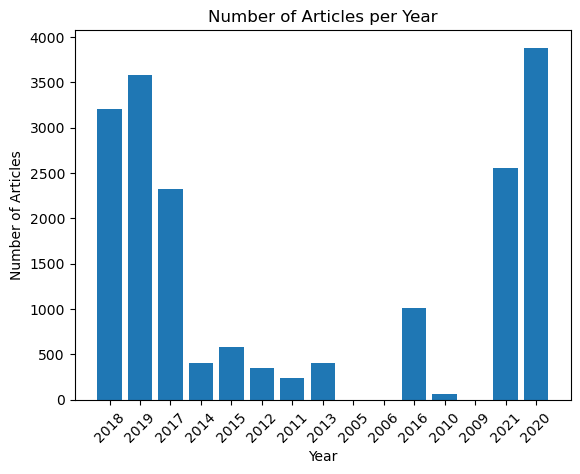

In [34]:
df_SA["time"] = df_SA["time"].astype(float)

# Creating a plot to visualize the number of articles for the years represented in SA
years = list(year_headlines.keys())
num_articles = [len(headlines) for headlines in year_headlines.values()]

plt.bar(years, num_articles)
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Year')
plt.xticks(rotation = 45)

# Saving the figure
plt.savefig('../out/articles_per_year.png')

In [35]:
# Creating a table to store emotion distributions for every year
emotion_distributions = {}

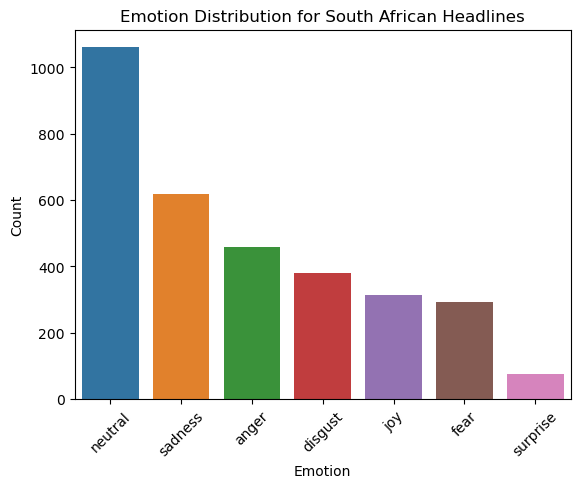

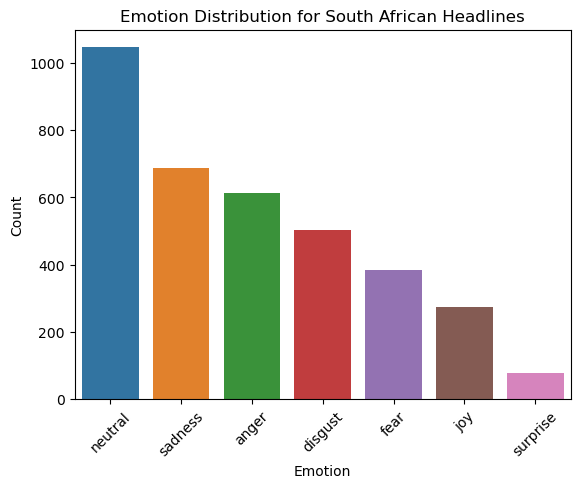

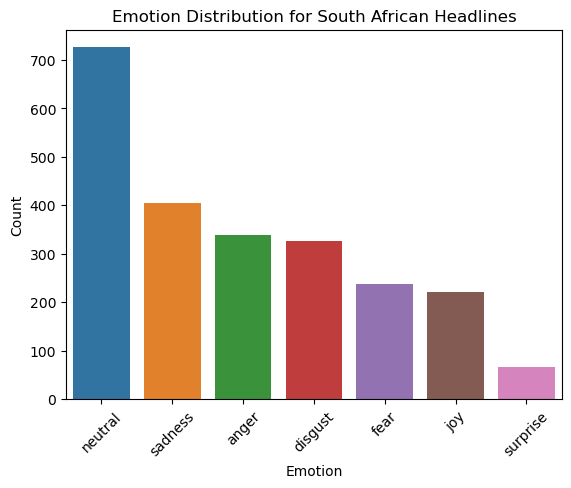

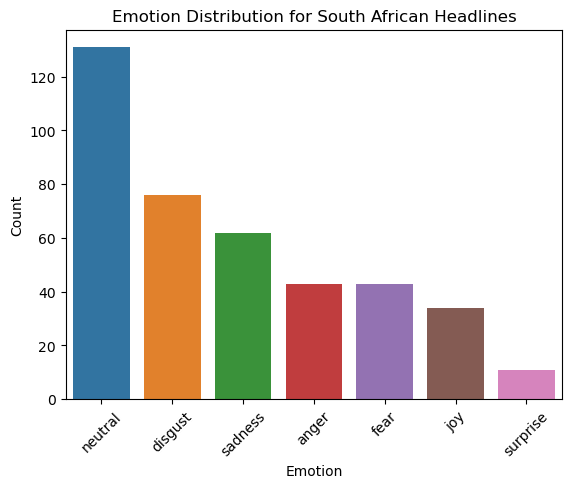

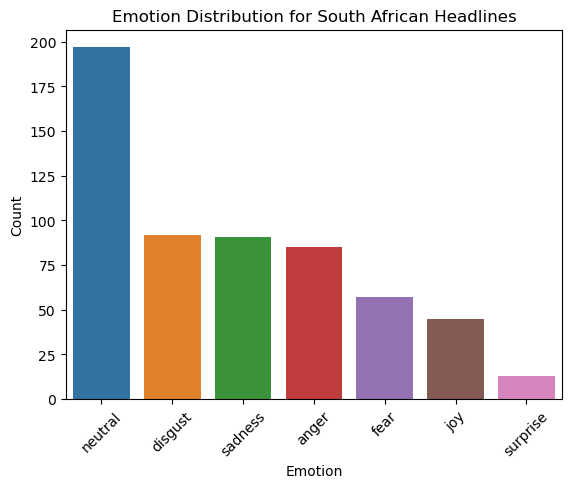

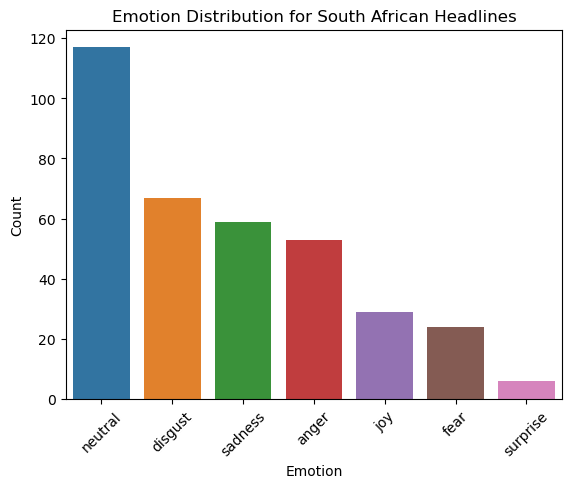

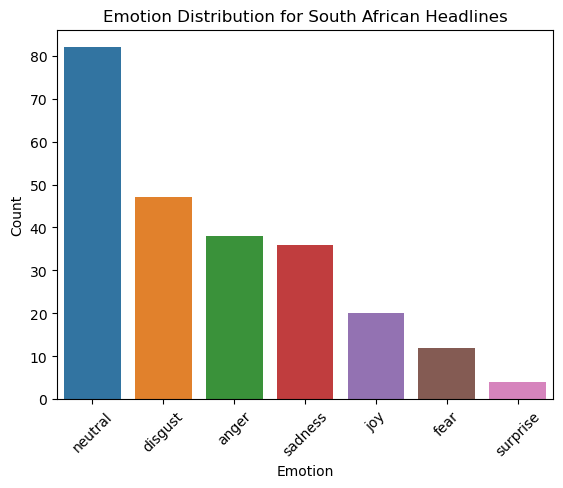

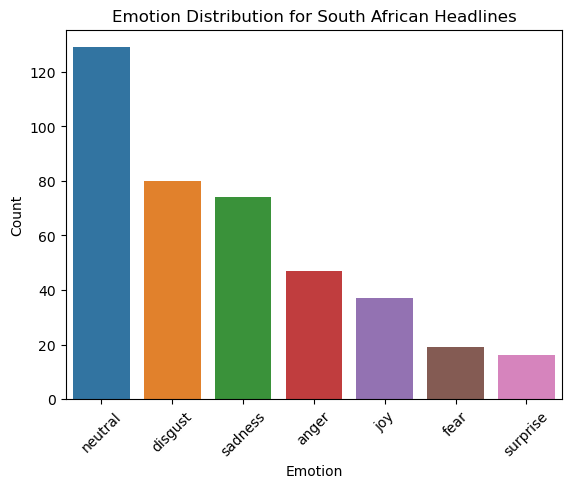

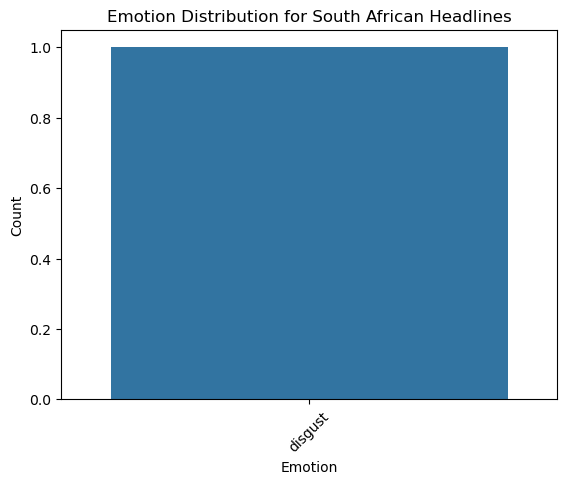

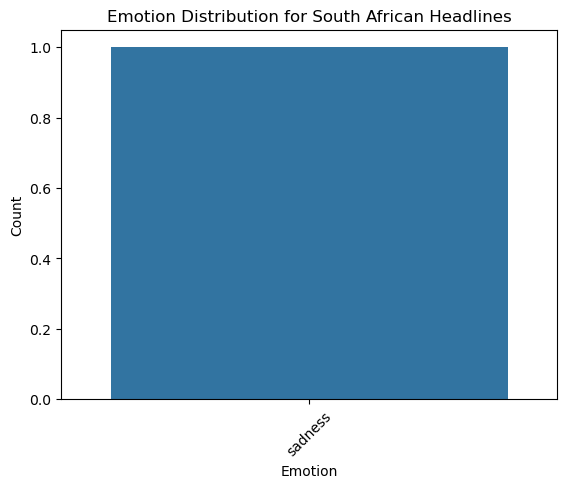

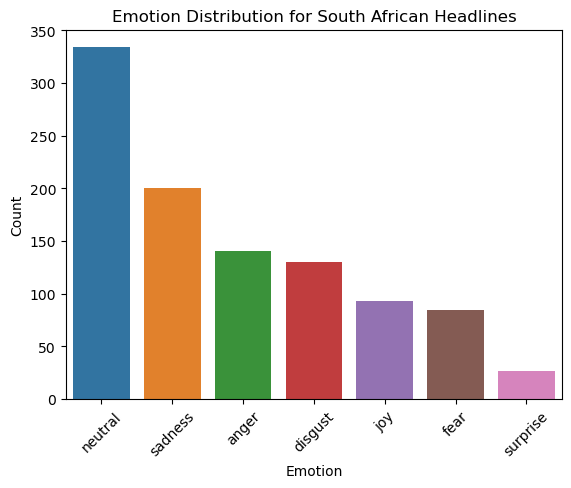

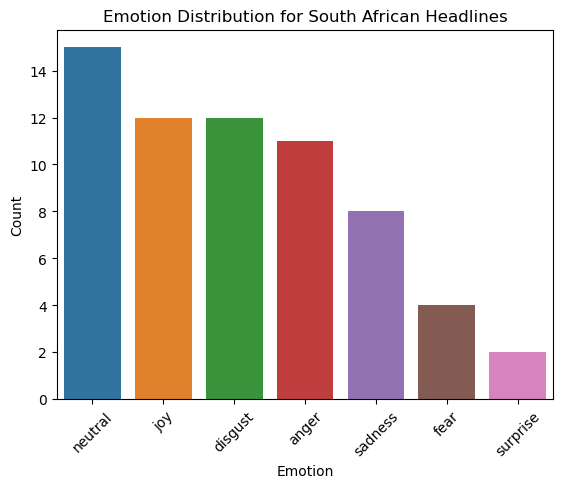

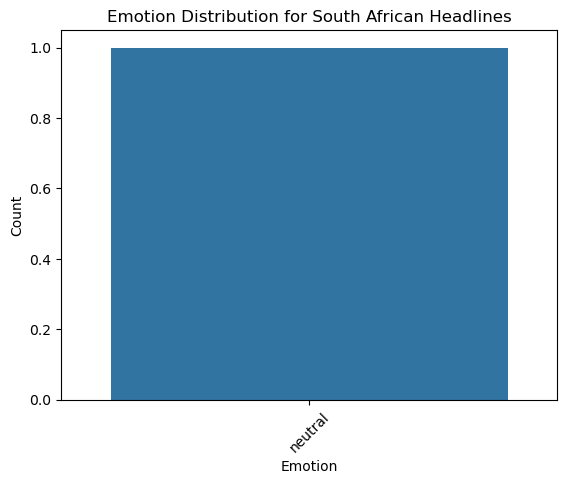

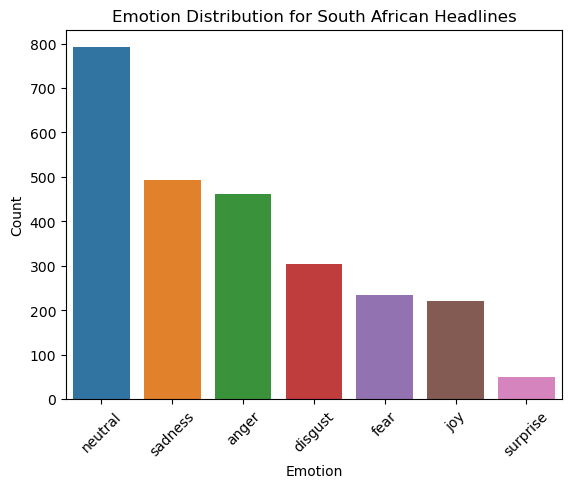

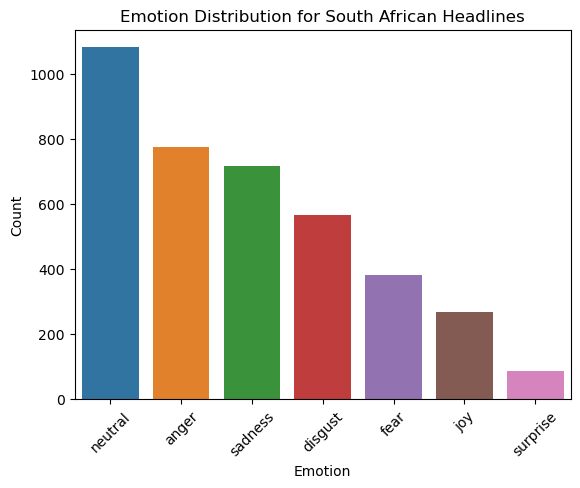

In [44]:
# Calculating and visualizing the emotion distribution for each year
for year, emotions in year_headlines.items():
    emotion_counts = pd.Series(emotions).value_counts()
    normalized_emotion_counts = pd.Series(emotions).value_counts(normalize=True)
        
    # Creating a bar plot for the emotion distribution
    plt.figure()
    sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.title(f'Emotion Distribution for South African Headlines')
    plt.xticks(rotation=45)
    
    # Saving the plot
    plt.savefig(f'../out/emotion_distribution_{year}.png')

    # Storing the emotion distribution in the table
    emotion_distributions[year] = normalized_emotion_counts

In [45]:
# Creating a table to display the normalized emotion distributions
emotion_table = pd.DataFrame(emotion_distributions)

In [46]:
# Save the emotion table as a CSV file
emotion_table.to_csv('../out/emotion_table.csv', index=True)